#           Customer Churn Analysis

## <b>PROBLEM STATEMENT:</b>

<b><em>Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
        
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. </em></b>

#### You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

<b>Note: You can find the dataset in the link below.

Downlaod Files:</b>
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.to_csv('D:\Telecom_customer_churn.csv')

In [3]:
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows: 7043
No. of Columns: 21


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
# As we have 31 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

# Comment :
- We have 7043 Rows and 21 Columns in this Telecom Dataset.
- <b> We have target Variable 'Churn' with object datatype, leading this to classification problem.</b>
- <b> There is interesting entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.</u> This implies that there is presence of string variable in this column or might be data error.</b>
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

In [6]:
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [7]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis

<b> Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [8]:
df.duplicated().sum() 

22

<b> We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset. </b>

In [9]:
df.drop_duplicates(keep='last',inplace= True)

In [10]:
df.shape

(7021, 20)

#### Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype .

In [11]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b> There is possibility of whitespaces in TotalCharges column. lets deal with it.</b>

In [12]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [13]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [14]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

<b> We have remove whitespaces so let now check for missing values</b>

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

#### We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [17]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.3533880171185
Median of TotalCharges: 1403.875


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [18]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### Checking for Null values after Imputation

In [19]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.</b>

### Statistical Matrix

In [20]:
df.describe().T

count         mean          std    min     25%      50%  \
tenure          7021.0    32.469449    24.534965   0.00    9.00    29.00   
MonthlyCharges  7021.0    64.851894    30.069001  18.25   35.75    70.40   
TotalCharges    7021.0  2290.353388  2265.044136  18.80  411.15  1410.25   

                   75%      max  
tenure            55.0    72.00  
MonthlyCharges    89.9   118.75  
TotalCharges    3801.7  8684.80

In [21]:
df[Categorical].describe().T

count unique               top  freq
gender            7021      2              Male  3541
Partner           7021      2                No  3619
Dependents        7021      2                No  4911
PhoneService      7021      2               Yes  6339
MultipleLines     7021      3                No  3368
InternetService   7021      3       Fiber optic  3090
OnlineSecurity    7021      3                No  3490
OnlineBackup      7021      3                No  3080
DeviceProtection  7021      3                No  3087
TechSupport       7021      3                No  3465
StreamingTV       7021      3                No  2802
StreamingMovies   7021      3                No  2777
Contract          7021      3    Month-to-month  3853
PaperlessBilling  7021      2               Yes  4161
PaymentMethod     7021      4  Electronic check  2359
SeniorCitizen     7021      2                 0  5880
Churn             7021      2                No  5164

#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.
#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [22]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

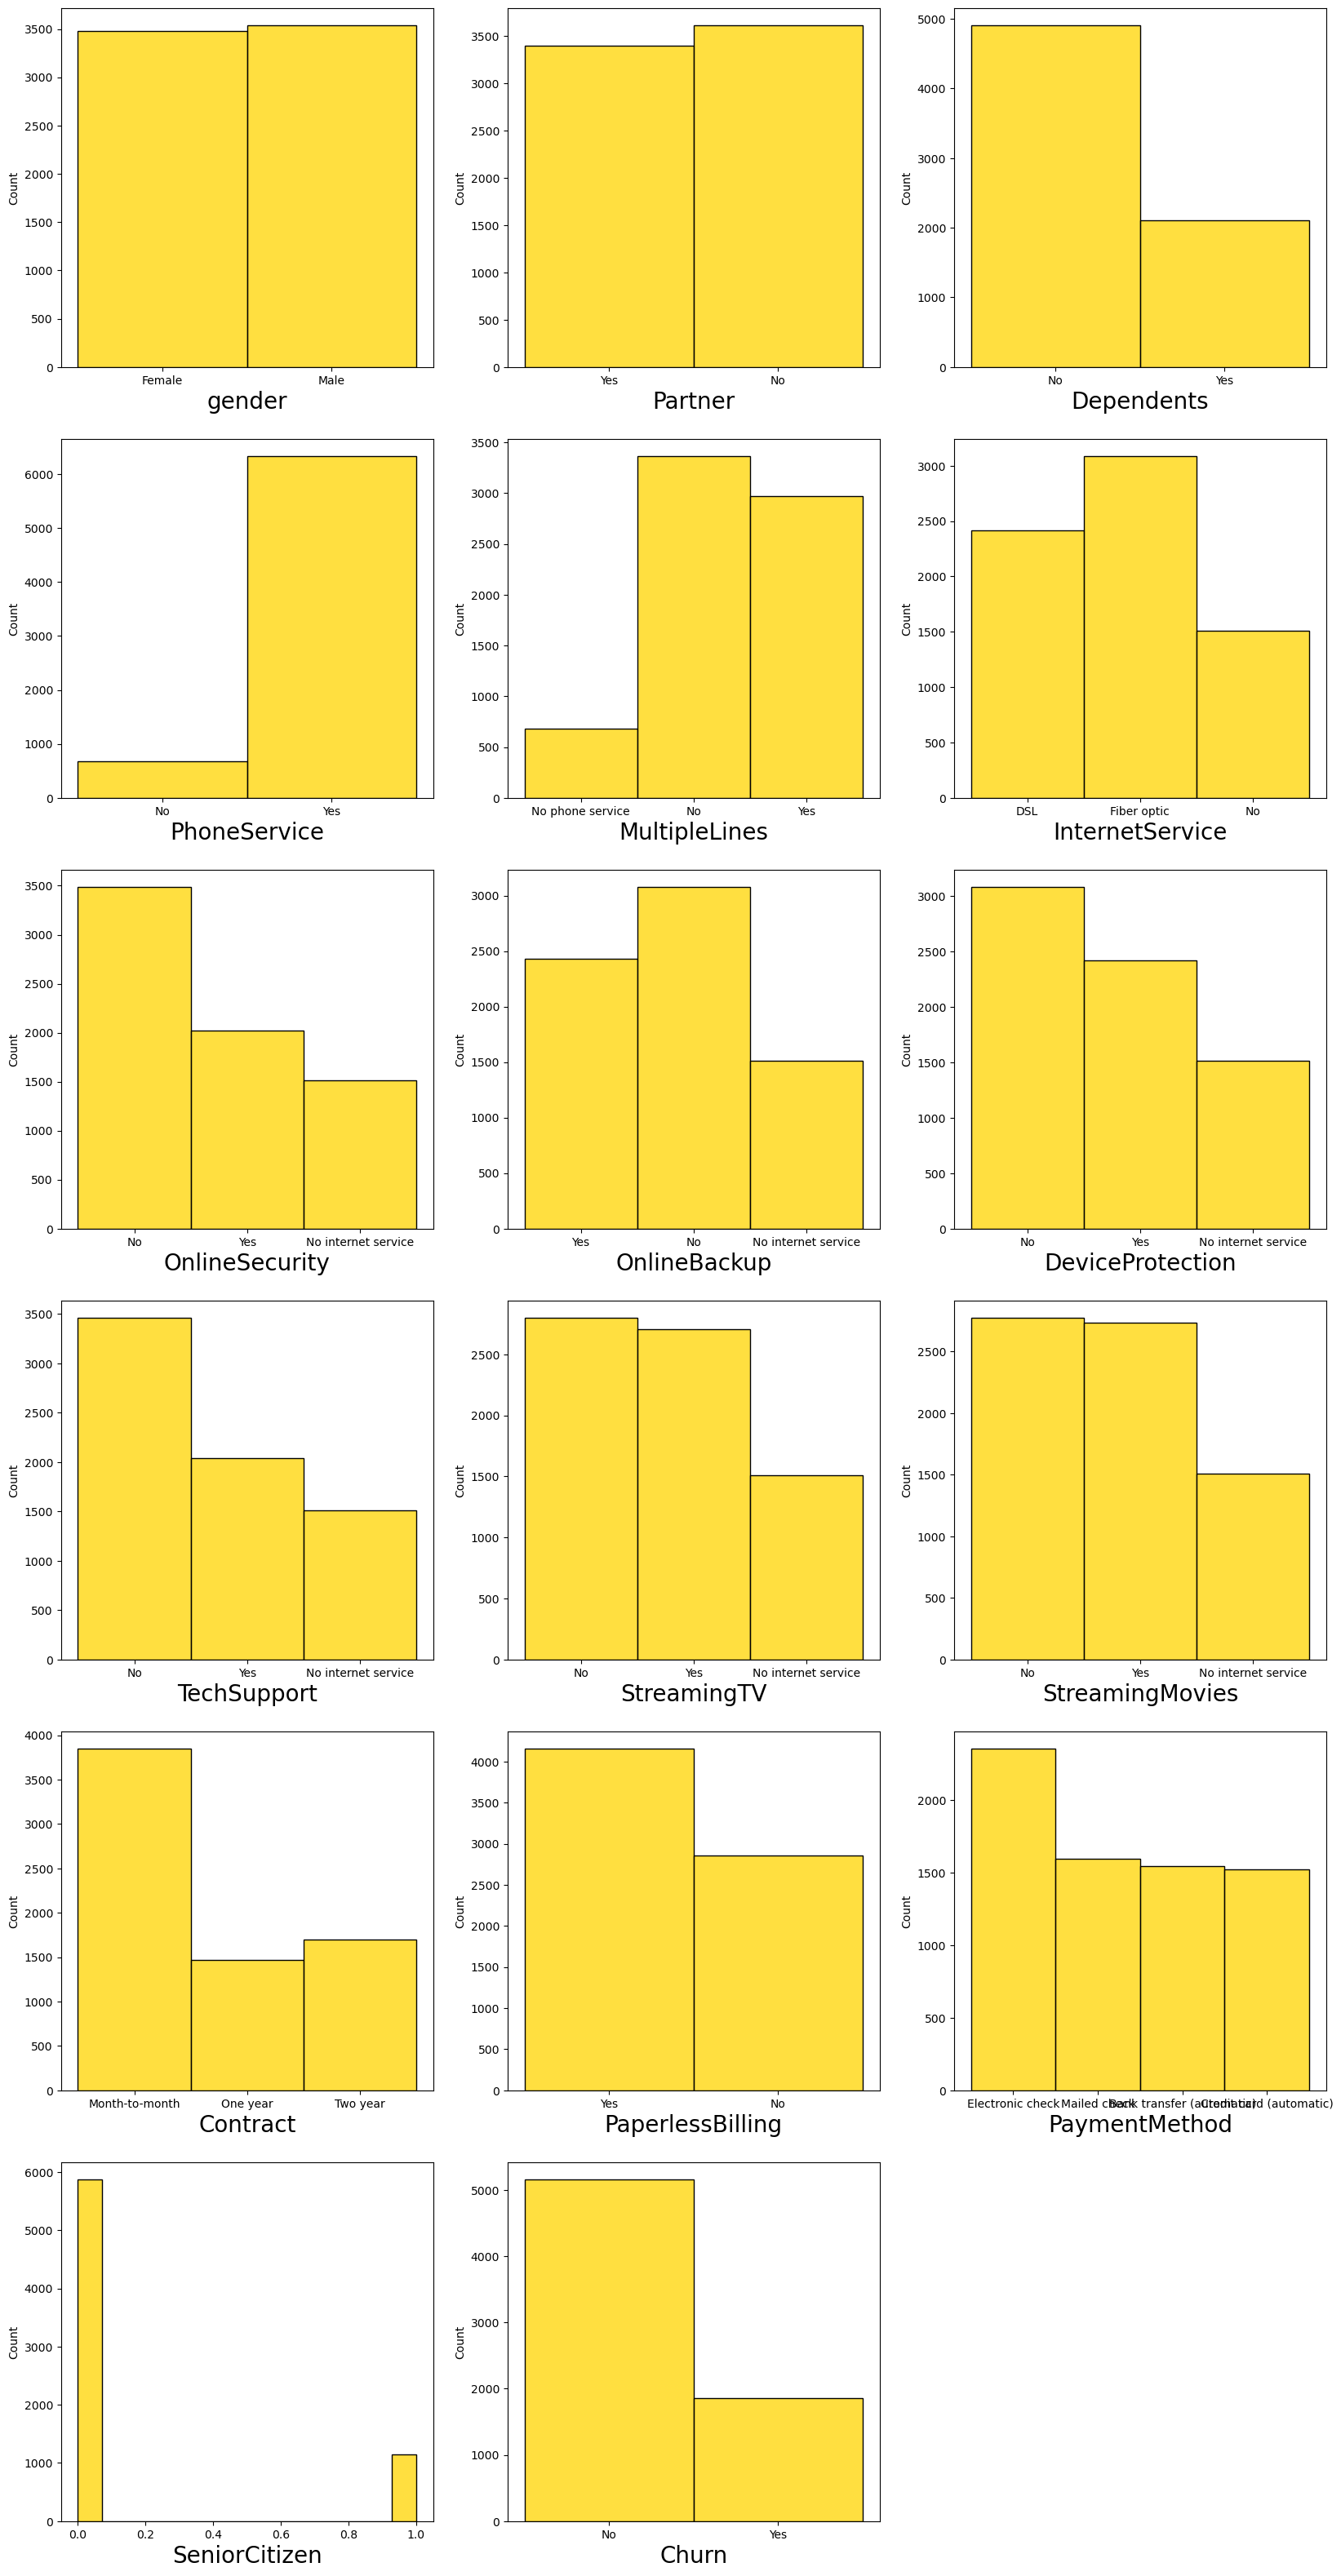

In [23]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<b> Now Start exploreing feature one by one, begin with Target Feature </b>

## Target Variable Churn

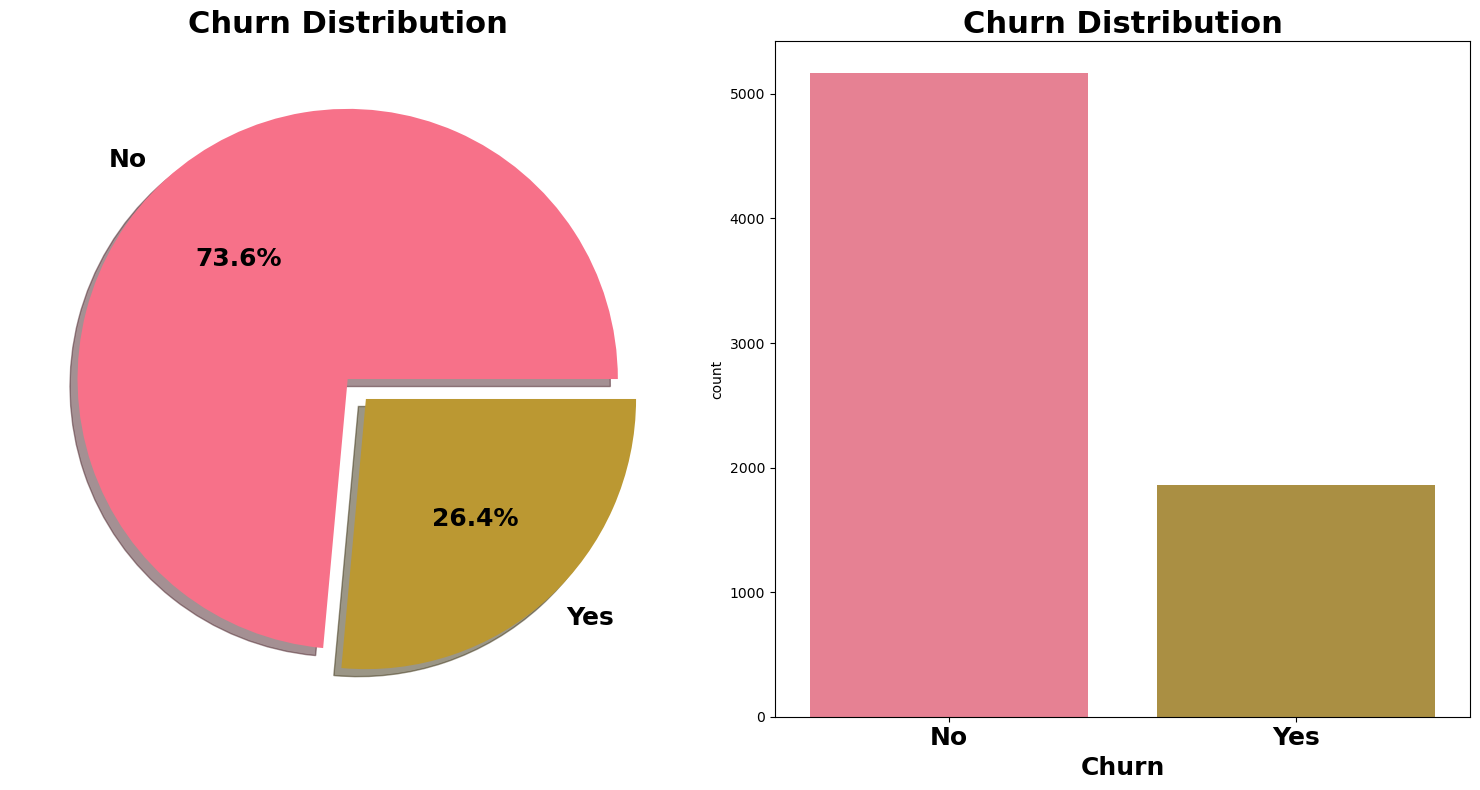

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Comment :
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

<b> Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.</b> 

### Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [26]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

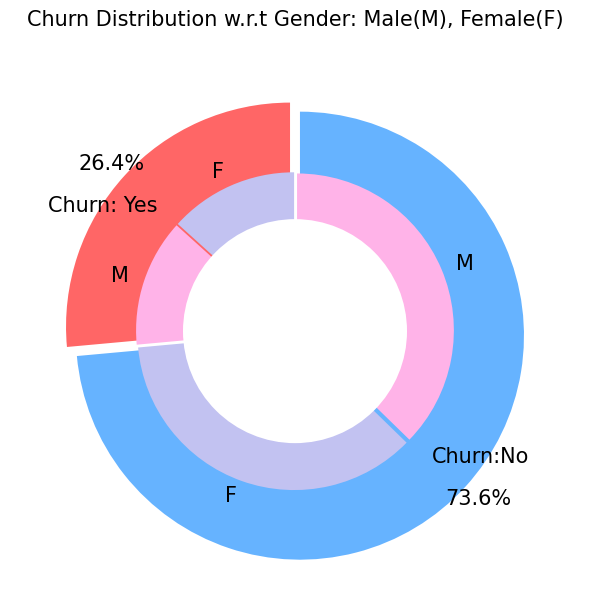

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1857,5164]
labels_gender = ["F","M","F","M"]
sizes_gender = [934,923 , 2546,2618]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f1','#ffb3e8', '#c2c2f1','#ffb3e8']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Comment :
- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

<b>Lets see how many of them are Senior Citizen and Churn tendency in senior citizen </

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

 <b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [29]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

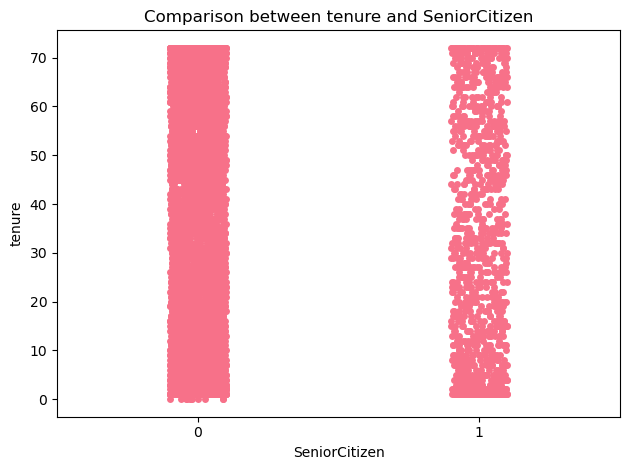

In [30]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

### Effect of Partner and Dependents on Churn

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

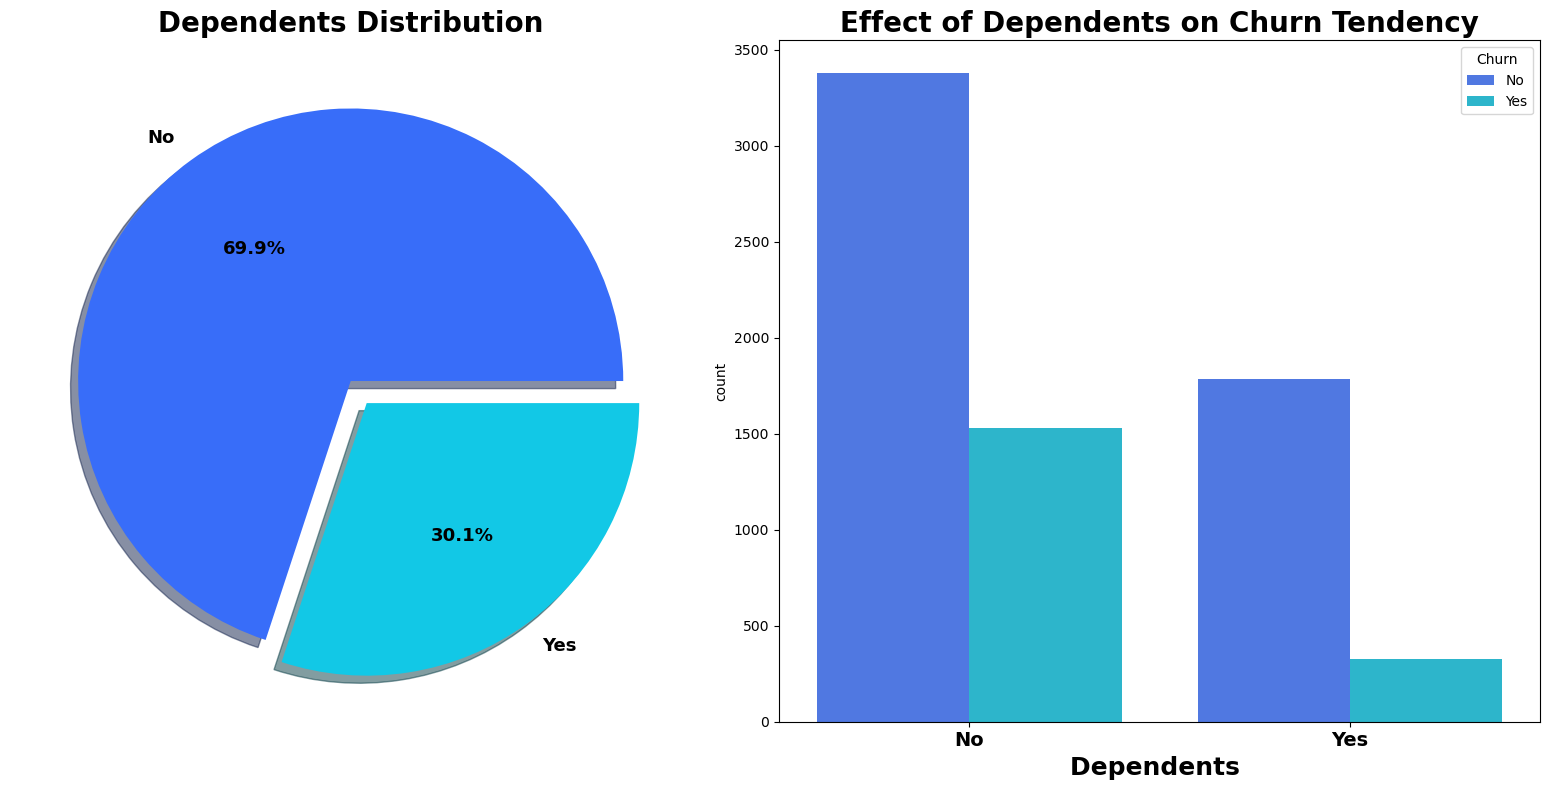

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation-
- **Customer having Partner have less tendency to Churn.**
- **Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%**

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

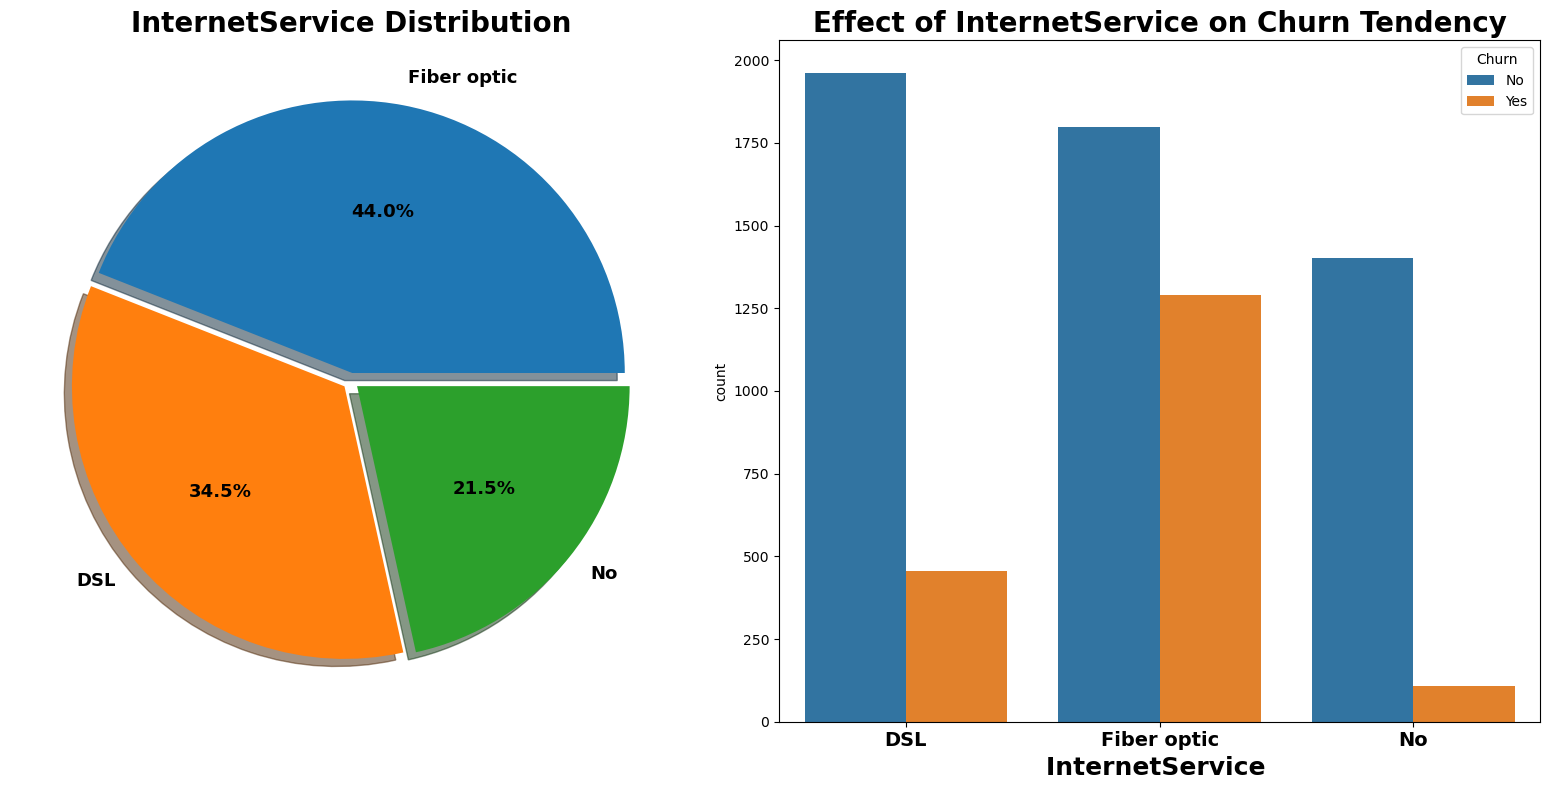

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

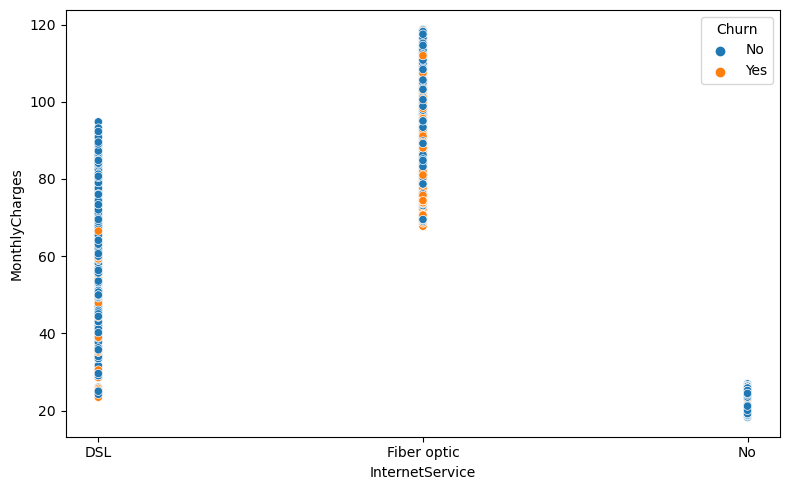

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

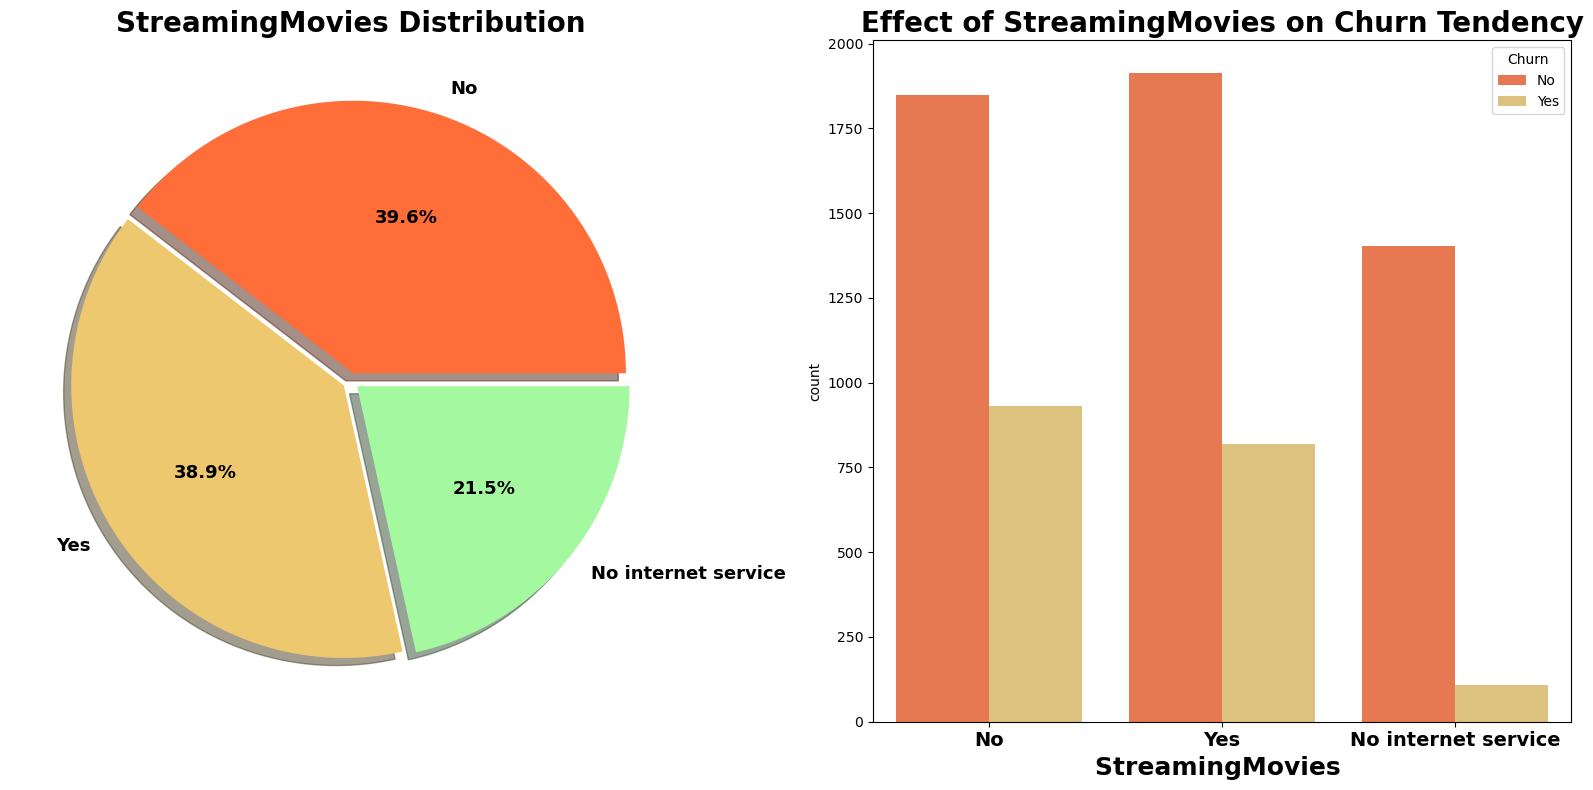

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

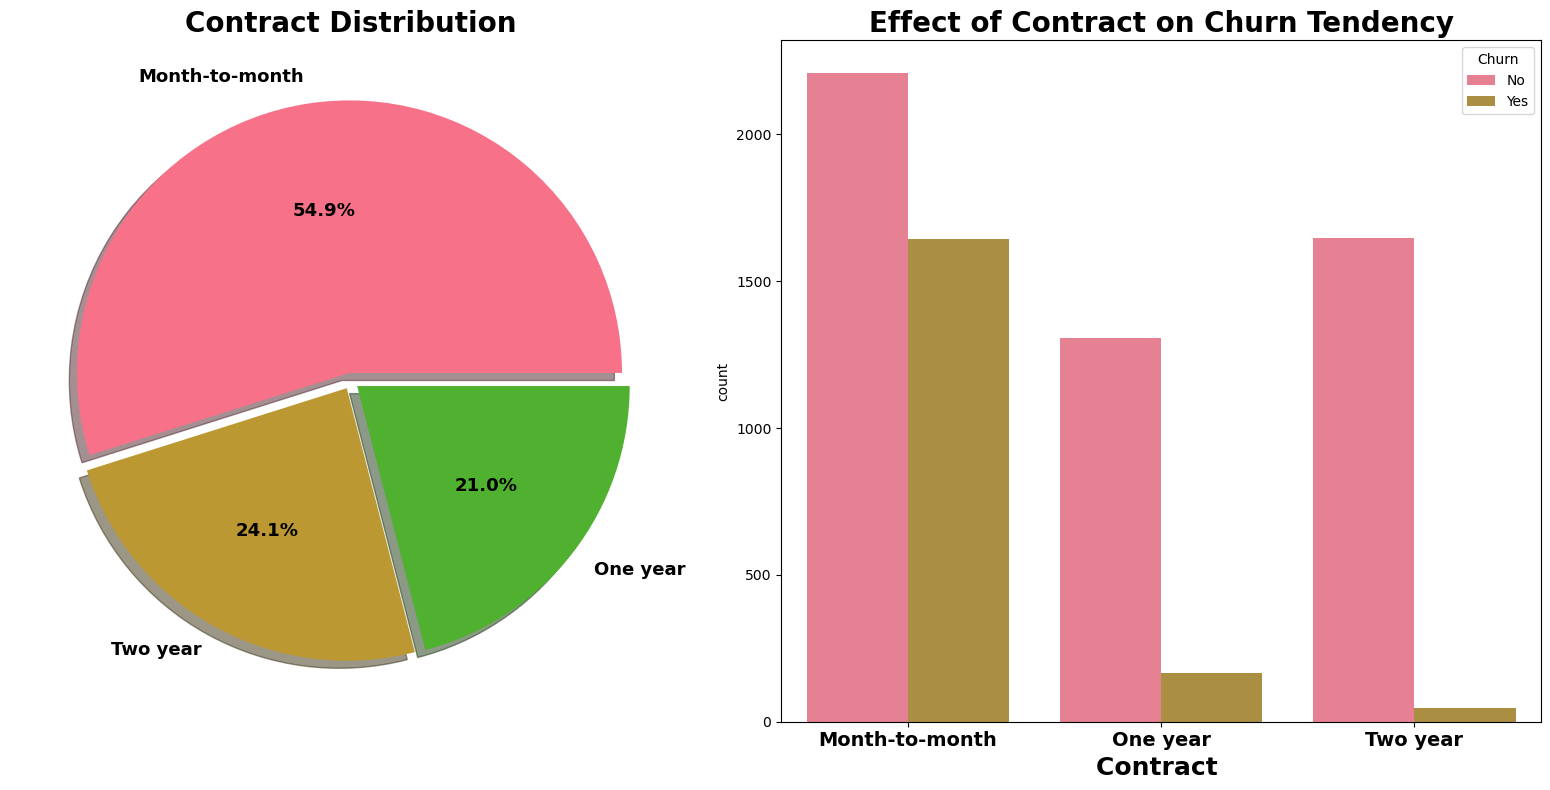

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

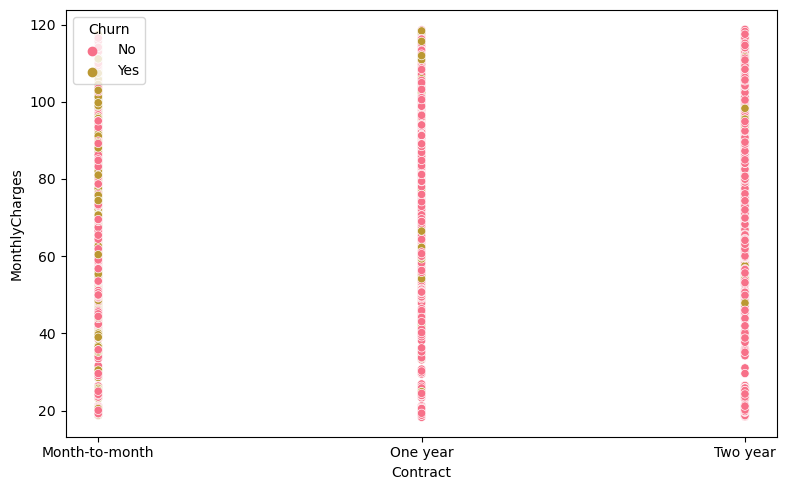

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

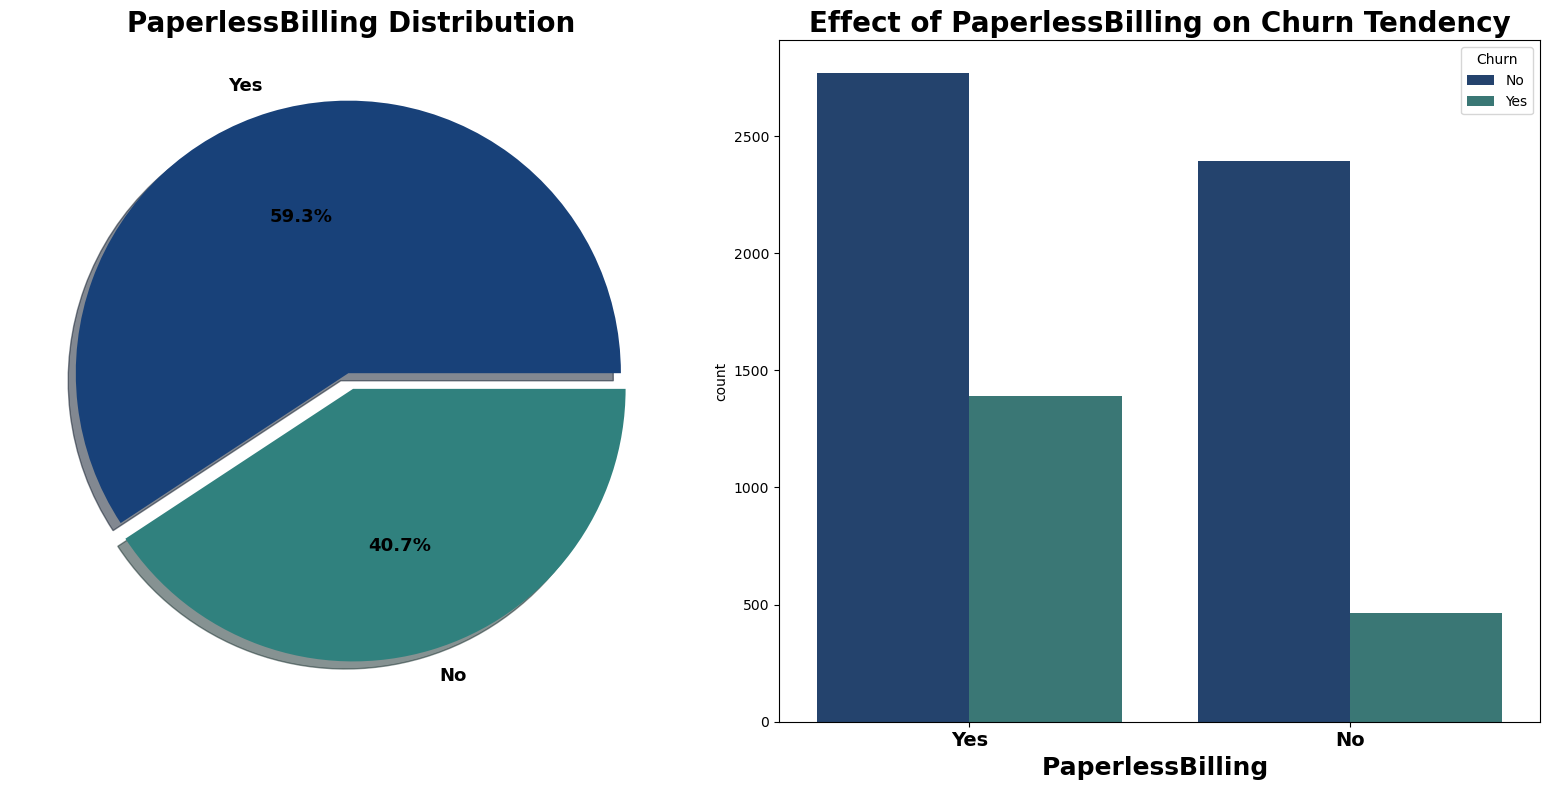

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**60% Customer perfer paperless billing.**

**The customers who prefer paperless billing they have high churn rate.**

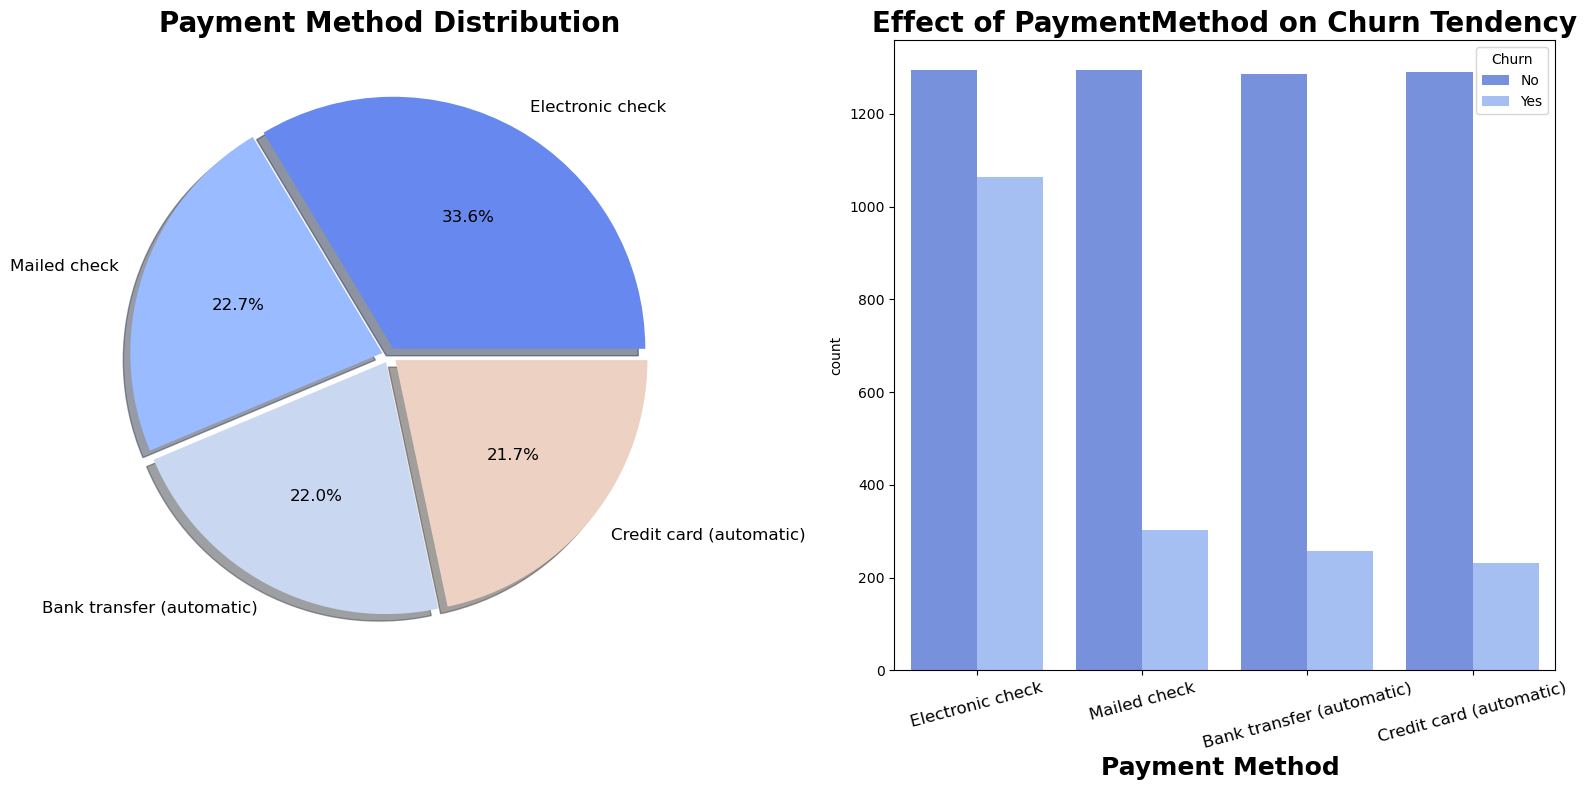

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

**We can see high Attrition tendency in customer who pay by Electronic check.**

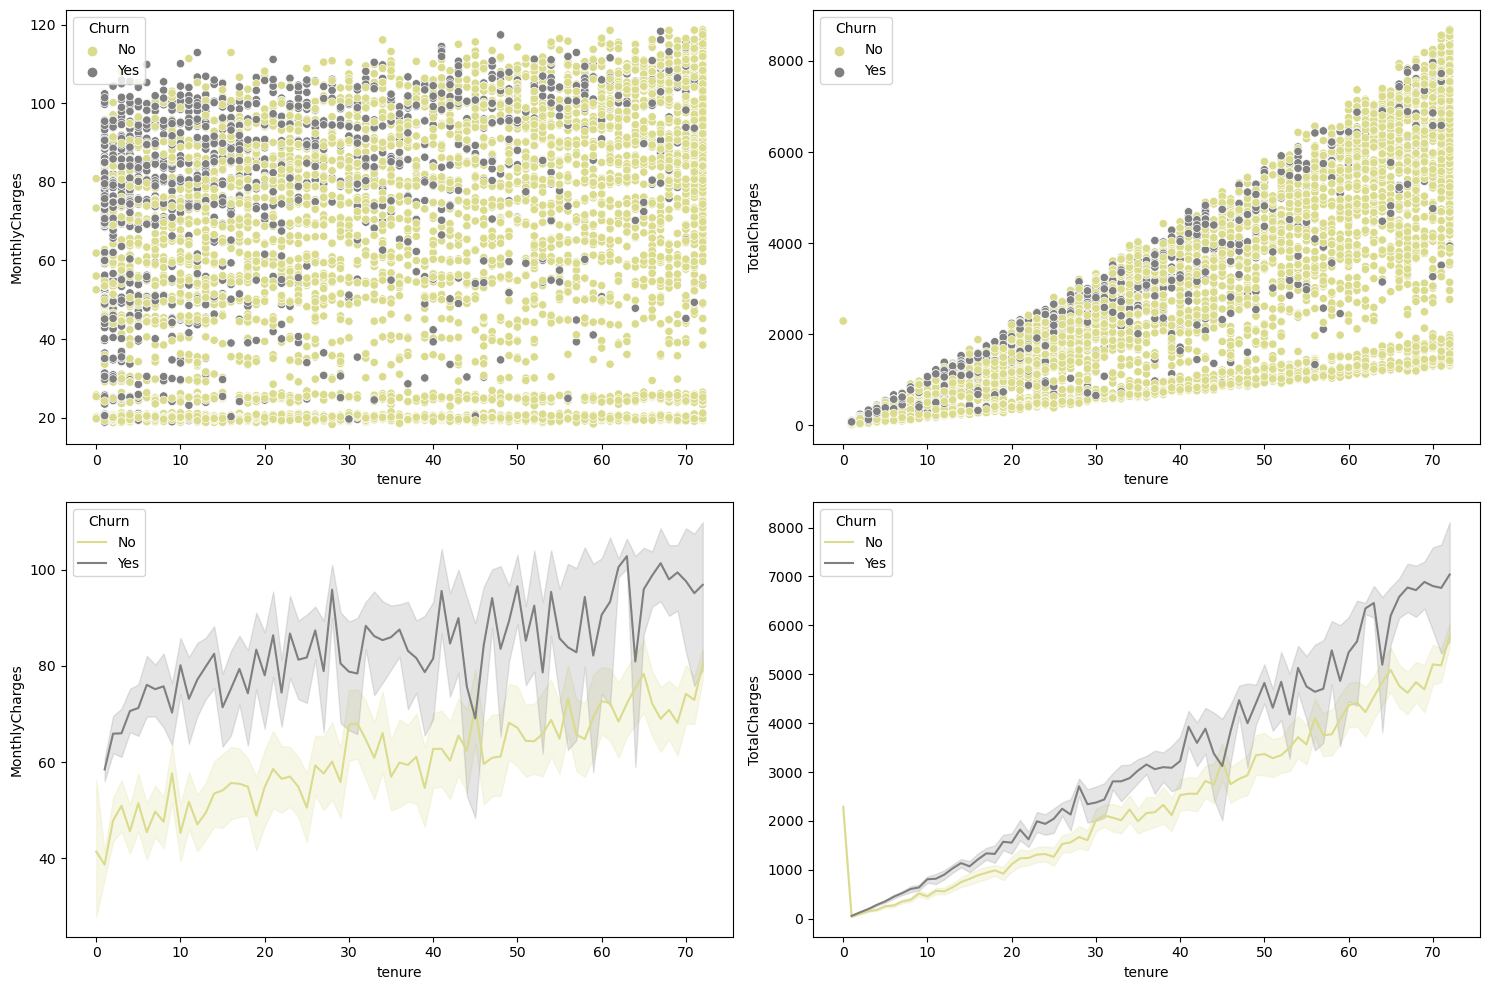

In [41]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

#### Observation:
- **High Monthly Charges in customer who choose churn compare to rest.**
- **Same goes with High Total Charges in customer who choose churn compare to rest.**

In [42]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [43]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [44]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female             0     Yes         No       1           No   
1    Male             0      No         No      34          Yes   
2    Male             0      No         No       2          Yes   
3    Male             0      No         No      45           No   
4  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [45]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [46]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [47]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

gender SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0             0        1           0       1             0   
1       1             0        0           0      34             1   
2       1             0        0           0       2             1   
3       1             0        0           0      45             0   
4       0             0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# Feature selection and Engineering

## 1. Outliers Detection and Removal

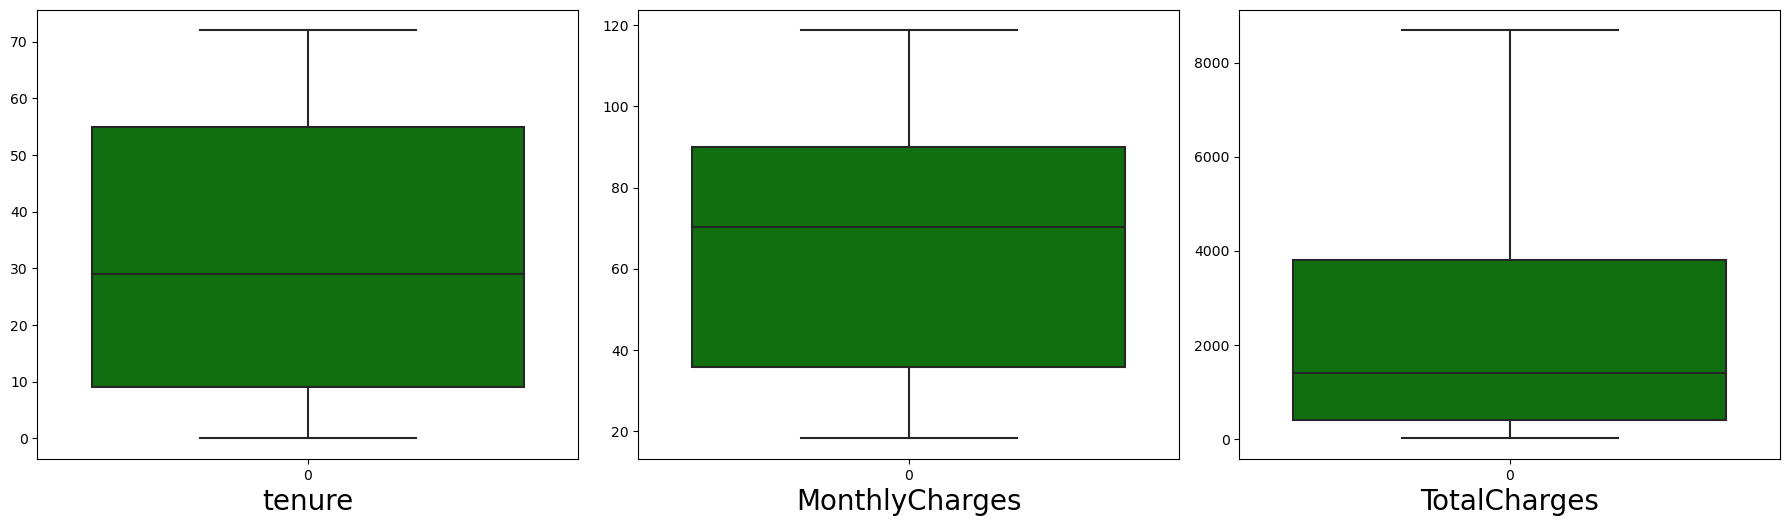

In [48]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see No outliers exist dataset.</b>

# 2. Skewness of features

In [49]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data.**

**There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

In [50]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

**'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.** 

**Out of which TotalCharges is skewed in nature. Which we gone transform here.**

In [51]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

## 3. Corrleation

In [52]:
df.corr()

gender   Partner  Dependents    tenure  PhoneService  \
gender            1.000000 -0.001014    0.011081  0.006185     -0.006769   
Partner          -0.001014  1.000000    0.451659  0.377346      0.018728   
Dependents        0.011081  0.451659    1.000000  0.157603     -0.001092   
tenure            0.006185  0.377346    0.157603  1.000000      0.009786   
PhoneService     -0.006769  0.018728   -0.001092  0.009786      1.000000   
MultipleLines    -0.005939  0.139827   -0.027083  0.340458     -0.019554   
InternetService  -0.001762  0.003667    0.046608 -0.026847      0.387549   
OnlineSecurity   -0.015262  0.150589    0.151984  0.325762     -0.015026   
OnlineBackup     -0.012182  0.152518    0.090502  0.370824      0.024439   
DeviceProtection  0.000449  0.165752    0.080015  0.371062      0.004043   
TechSupport      -0.007045  0.126422    0.133303  0.323197     -0.018980   
StreamingTV      -0.006461  0.136443    0.046140  0.288737      0.055807   
StreamingMovies  -0.008781  0.128635    0.020525  0.296225      0.044322   
Contract          0.000811  0.293042    0.241912  0.670728      0.003101   
PaperlessBilling -0.011350 -0.015776   -0.112220  0.005053      0.016824   
PaymentMethod     0.016304 -0.152069   -0.038185 -0.367827     -0.005304   
MonthlyCharges   -0.013158  0.094301   -0.116191  0.245251      0.248984   
TotalCharges     -0.003978  0.335572    0.091748  0.831474      0.075612   
Churn            -0.008763 -0.149135   -0.163459 -0.351508      0.011323   

                  MultipleLines  InternetService  OnlineSecurity  \
gender                -0.005939        -0.001762       -0.015262   
Partner                0.139827         0.003667        0.150589   
Dependents            -0.027083         0.046608        0.151984   
tenure                 0.340458        -0.026847        0.325762   
PhoneService          -0.019554         0.387549       -0.015026   
MultipleLines          1.000000        -0.106819        0.006599   
InternetService       -0.106819         1.000000       -0.029421   
OnlineSecurity         0.006599        -0.029421        1.000000   
OnlineBackup           0.116625         0.035736        0.184211   
DeviceProtection       0.121633         0.044563        0.175061   
TechSupport            0.010909        -0.027019        0.284255   
StreamingTV            0.174225         0.107508        0.043553   
StreamingMovies        0.180113         0.098435        0.054847   
Contract               0.108553         0.102456        0.374556   
PaperlessBilling       0.164814        -0.137056       -0.157024   
PaymentMethod         -0.174073         0.082669       -0.096968   
MonthlyCharges         0.432246        -0.320525       -0.053347   
TotalCharges           0.433967        -0.199000        0.223633   
Churn                  0.040175        -0.047366       -0.288505   

                  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender               -0.012182          0.000449    -0.007045    -0.006461   
Partner               0.152518          0.165752     0.126422     0.136443   
Dependents            0.090502          0.080015     0.133303     0.046140   
tenure                0.370824          0.371062     0.323197     0.288737   
PhoneService          0.024439          0.004043    -0.018980     0.055807   
MultipleLines         0.116625          0.121633     0.010909     0.174225   
InternetService       0.035736          0.044563    -0.027019     0.107508   
OnlineSecurity        0.184211          0.175061     0.284255     0.043553   
OnlineBackup          1.000000          0.186760     0.194841     0.146071   
DeviceProtection      0.186760          1.000000     0.239738     0.275710   
TechSupport           0.194841          0.239738     1.000000     0.160326   
StreamingTV           0.146071          0.275710     0.160326     1.000000   
StreamingMovies       0.135587          0.287869     0.160334     0.433969   
Contract              0.280658          0.3500

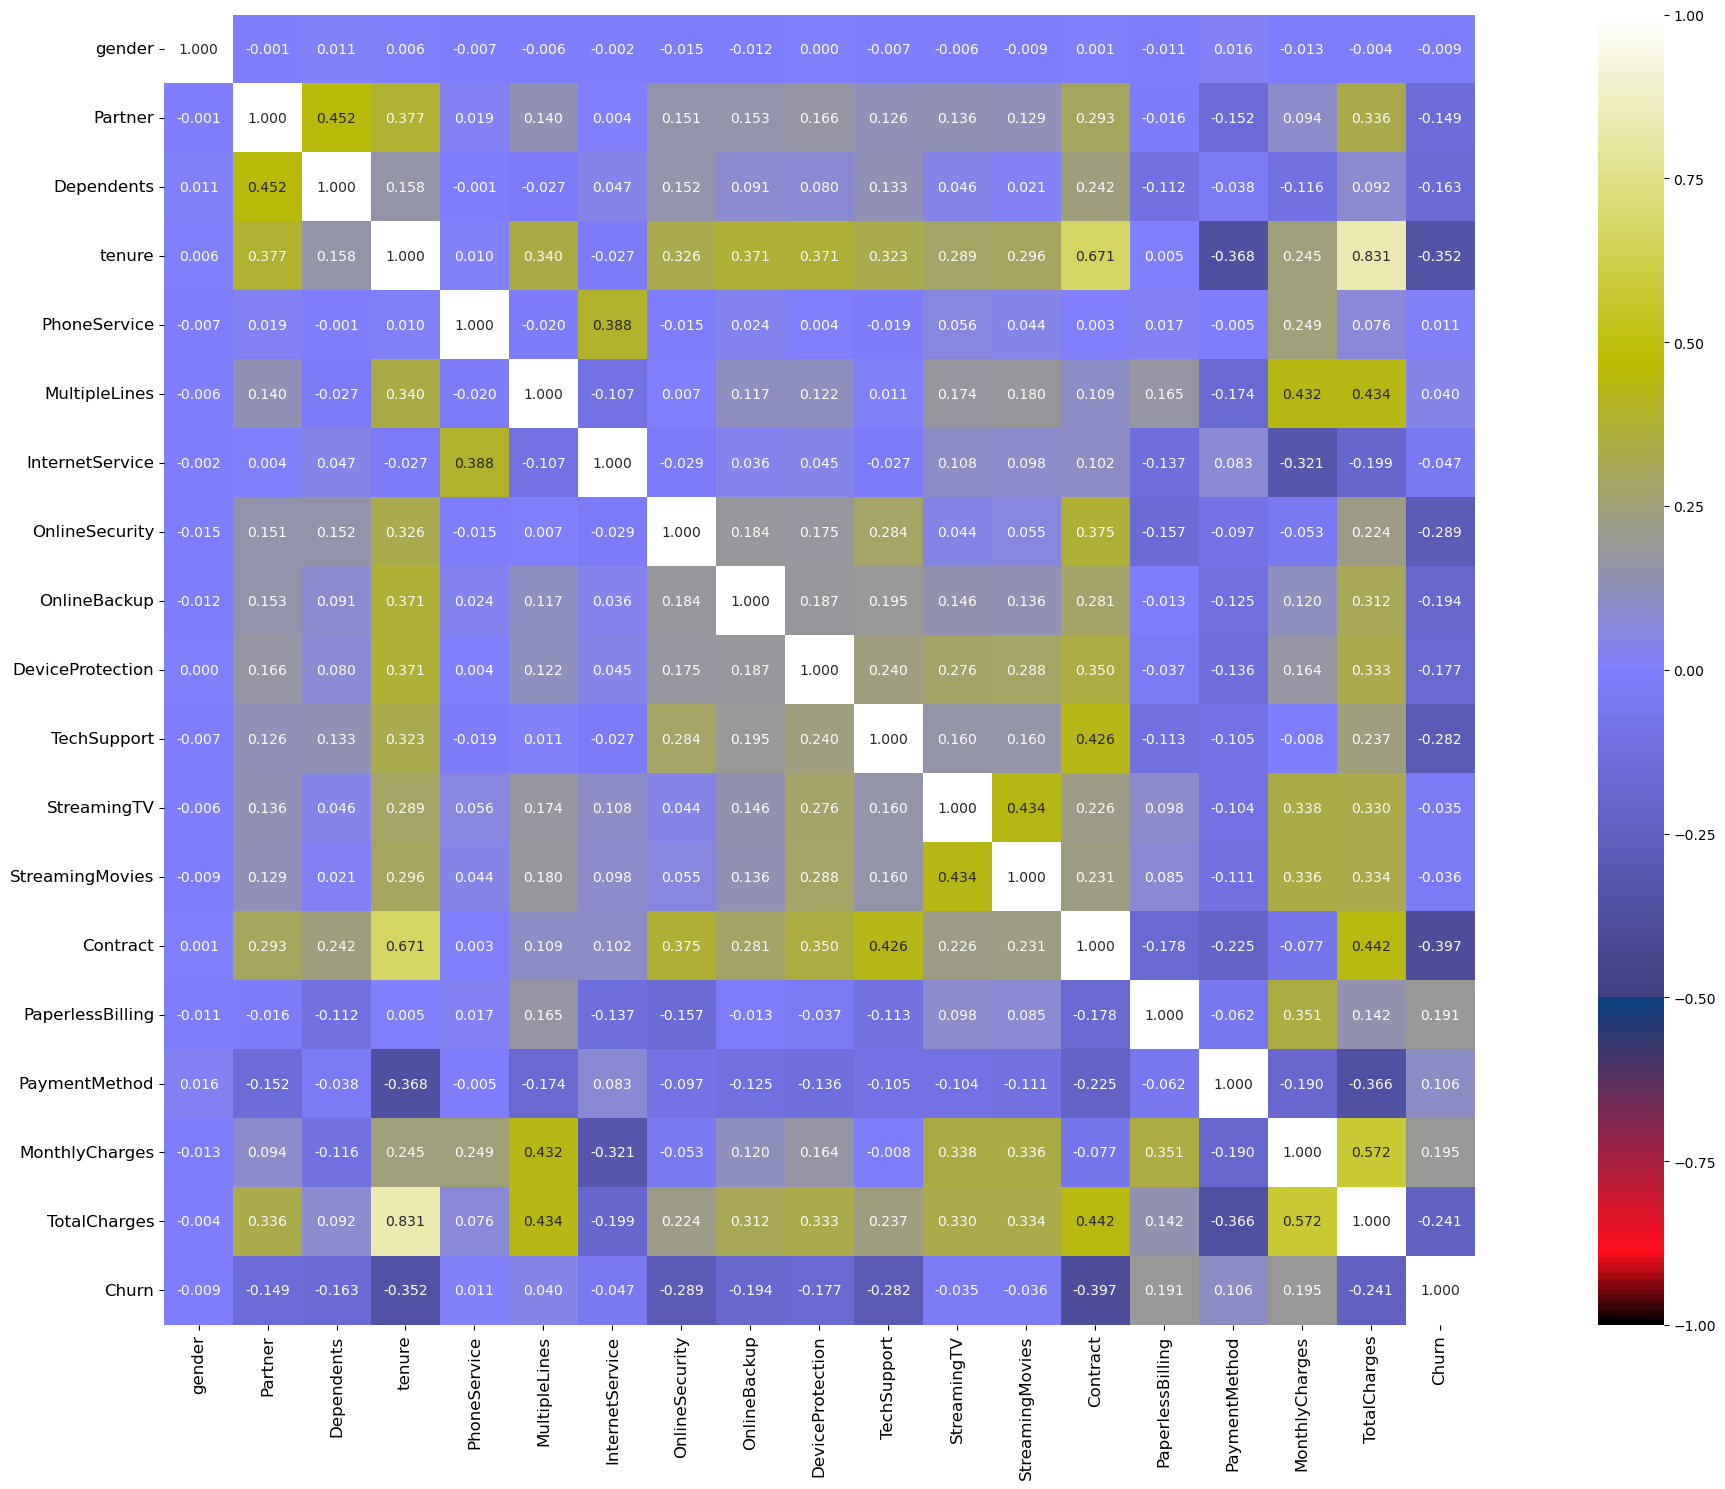

In [53]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

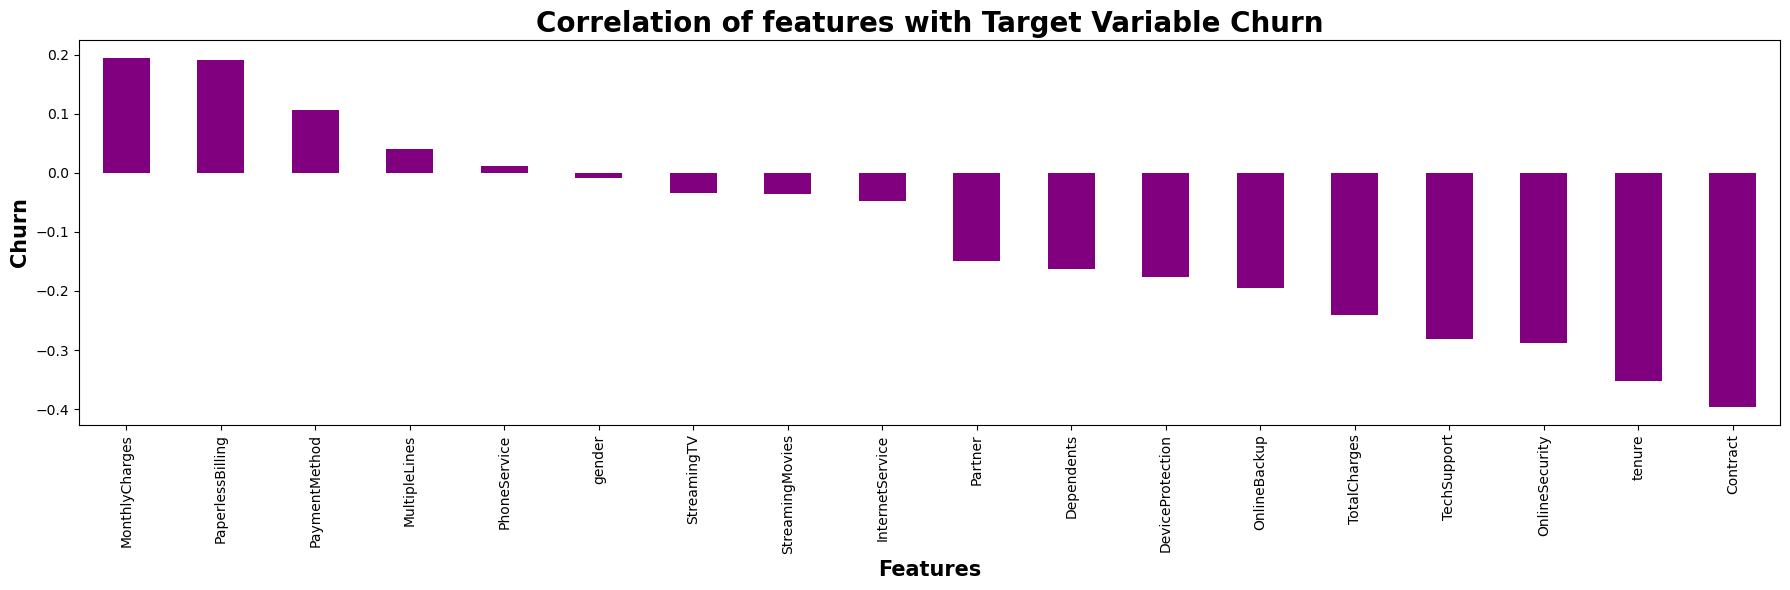

In [54]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

## 4. Balanceing Imbalanced target feature


In [55]:
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [60]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [61]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## 5. Checking Multicollinearity between features using variance_inflation_factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.013141            gender
1     1.149679     SeniorCitizen
2     1.535726           Partner
3     1.446018        Dependents
4     6.420219            tenure
5     1.744812      PhoneService
6     1.396783     MultipleLines
7     1.729395   InternetService
8     1.334995    OnlineSecurity
9     1.222341      OnlineBackup
10    1.316949  DeviceProtection
11    1.399024       TechSupport
12    1.530511       StreamingTV
13    1.506085   StreamingMovies
14    2.532467          Contract
15    1.166801  PaperlessBilling
16    1.166774     PaymentMethod
17    3.435436    MonthlyCharges
18    6.042954      TotalCharges

**Independent feature VIF is within permissible limit of 10**

## PCA

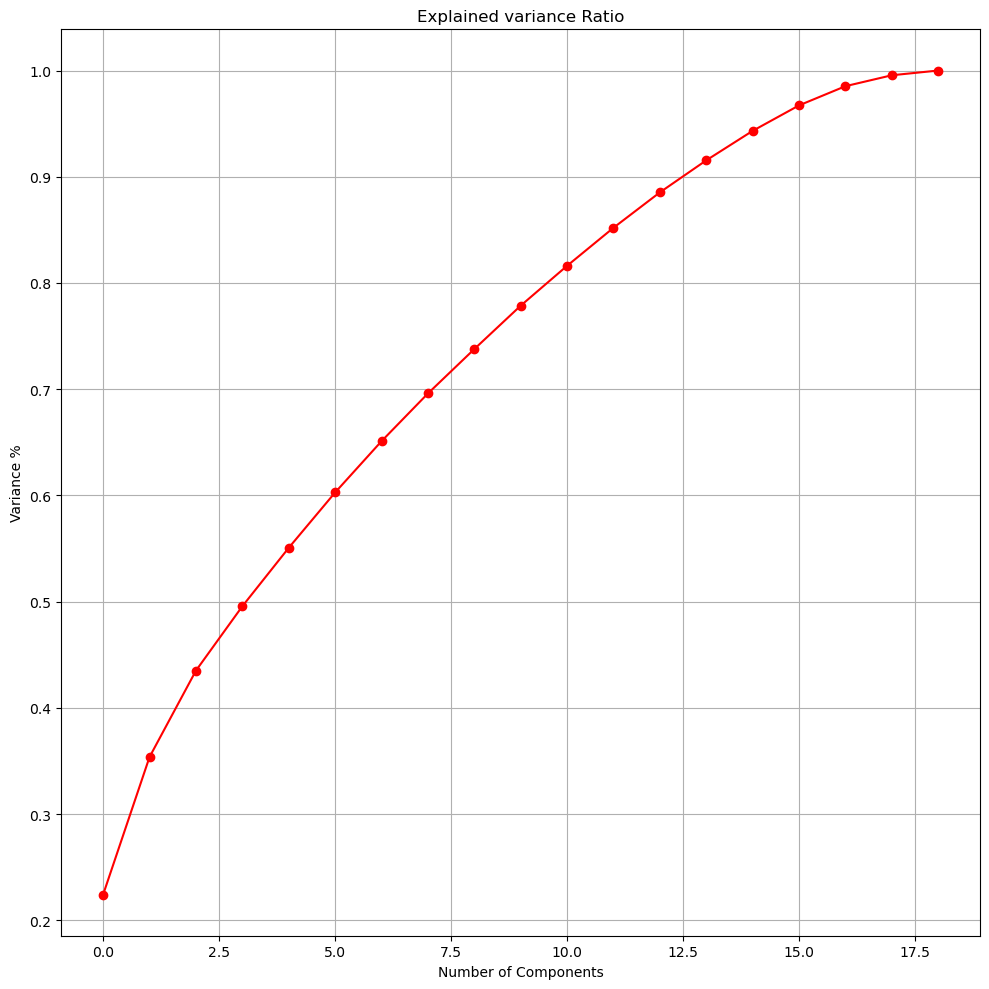

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data.  We shall pick the first 13 components for our prediction. </b>

In [65]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [66]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Machine Learning Model Building

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,RocCurveDisplay

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7229, 13)
Training target vector size: (7229,)
Test feature matrix size: (3099, 13)
Test target vector size: (3099,)


### Finding best Random state

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.813810906744111 on Random_state 208


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7947725072604066


Confusion matrix of Logistics Regression : 
 [[1201  400]
 [ 236 1262]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1601
           1       0.76      0.84      0.80      1498

    accuracy                           0.79      3099
   macro avg       0.80      0.80      0.79      3099
weighted avg       0.80      0.79      0.79      3099



### Finding Optimal value of n_neighbors for KNN

In [72]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.46842888592412696
RMSE value for k=  2 is: 0.48700439597992895
RMSE value for k=  3 is: 0.4786503559786381
RMSE value for k=  4 is: 0.4762849673455938
RMSE value for k=  5 is: 0.4769619896736188
RMSE value for k=  6 is: 0.4711762929777073
RMSE value for k=  7 is: 0.47220244945918066
RMSE value for k=  8 is: 0.4687731923917266
RMSE value for k=  9 is: 0.47151859327202167
RMSE value for k=  10 is: 0.4670491218491595
RMSE value for k=  11 is: 0.47322638080128826
RMSE value for k=  12 is: 0.47322638080128826
RMSE value for k=  13 is: 0.47763805236542983
RMSE value for k=  14 is: 0.47254400642930816
RMSE value for k=  15 is: 0.4769619896736188
RMSE value for k=  16 is: 0.47151859327202167
RMSE value for k=  17 is: 0.4742481014166759
RMSE value for k=  18 is: 0.47254400642930816
RMSE value for k=  19 is: 0.47594609503848373
RMSE value for k=  20 is: 0.47560698128325396


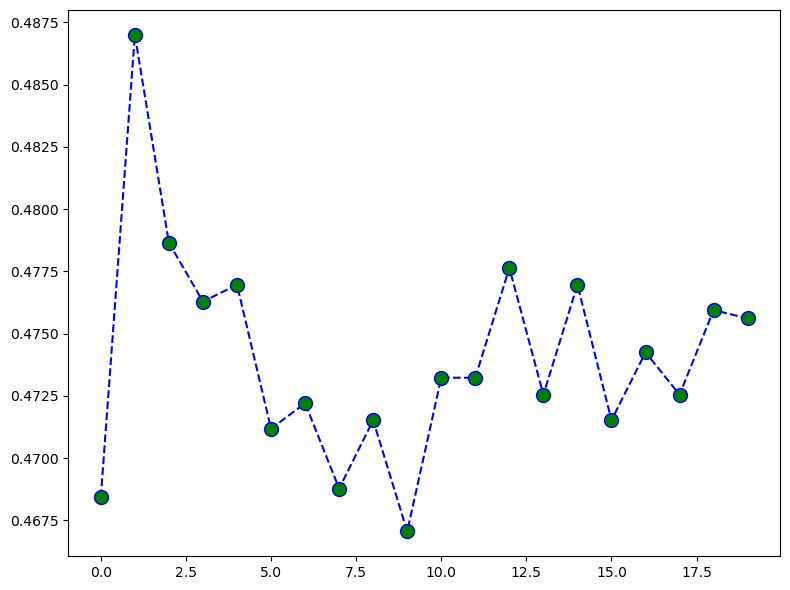

In [73]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

#### Comment- 
At k=18, we get the minimum RMSE value which approximately 0.47254400642930816, and shoots up on further increasing the k value. We can safely say that k=18 will give us the best result in this case


## Applying other classification algorithm

In [74]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7947725072604066


Confusion matrix : 
 [[1201  400]
 [ 236 1262]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1601
           1       0.76      0.84      0.80      1498

    accuracy                           0.79      3099
   macro avg       0.80      0.80      0.79      3099
weighted avg       0.80      0.79      0.79      3099



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8170377541142304


Confusion matrix : 
 [[1243  358]
 [ 209 1289]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.78      0.81      1601
           1       0.78      0.86      0.82      1498

    accuracy                           0.82      3099
   macro avg       0.82      0.82      0.82      3099
weighted avg       0.82      0.82      0

# CrossValidation :

In [75]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.74056147 0.73475315 0.7928364  0.80145278 0.80435835]
Mean Score : 0.77479243089429
Std deviation : 0.030611781782987728




Cross Validation Score SVC() :

Score : [0.74782188 0.75411423 0.82090997 0.83196126 0.83244552]
Mean Score : 0.7974505718082924
Std deviation : 0.03822832226922261




Cross Validation Score GaussianNB() :

Score : [0.72458858 0.72362052 0.78509197 0.80387409 0.79903148]
Mean Score : 0.7672413267733791
Std deviation : 0.03575821595358413




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70474347 0.7124879  0.76379477 0.77820823 0.77772397]
Mean Score : 0.7473916681707056
Std deviation : 0.03217425466596959




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.74540174 0.75121007 0.80009681 0.80677966 0.81307506]
Mean Score : 0.783312667446423
Std deviation : 0.028934485493519565




Cross Validation Score RandomForestClassifier() :

Score : [0.73184898 0.75653437 

# Hyper Parameter Tuning : GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [78]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.798 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.814 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [79]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 70}

# Final Model

In [80]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8357534688609228


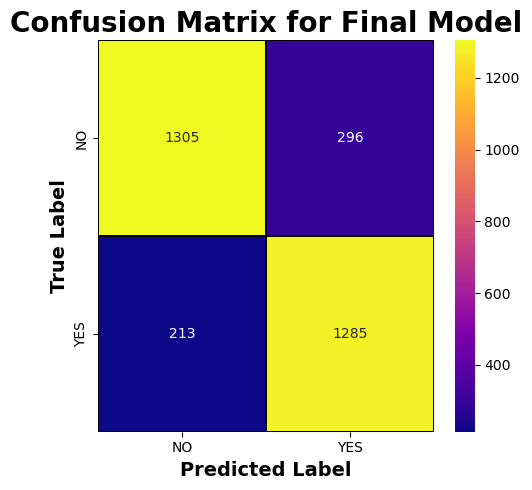

In [81]:

# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)
x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)
plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()


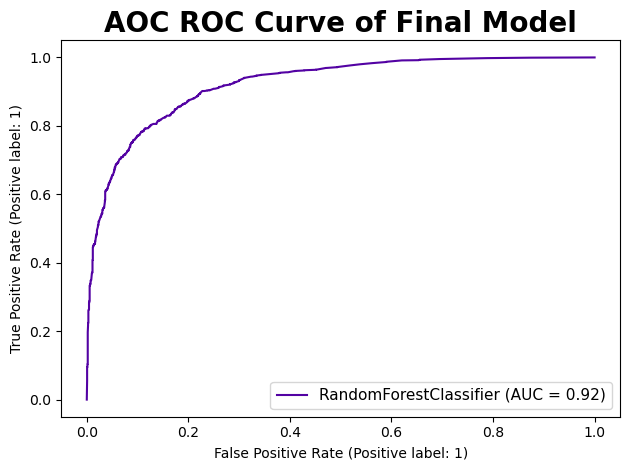

Auc Score :
 0.8364629833323465


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [86]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

## Predicting the Final Model

In [87]:
# Prediction
prediction = Final_mod.predict(X_test)

In [88]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0                 0              0
1                 1              1
2                 1              0
3                 0              0
4                 1              1

In [89]:
df_Pred.to_csv('D:\Customer_Churn_Final.csv')